## DS703: Spring 2024 Assignment 3: Clustering Techniques
### Author: Daniel Gebre
#### ID: 2023010536

### Step 1: Import Necessary Libraries
First, we'll import the libraries required for data manipulation, visualization, and clustering. Pandas and NumPy are used for data handling, Matplotlib and Seaborn for visualization, and scikit-learn for preprocessing and applying the K-means algorithm.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import DBSCAN

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)



### Step 2: Load the Dataset
We load the dataset using pandas, which will allow us to manipulate and explore the data easily. Assume the data is stored locally or adjust the path as necessary for your environment.

In [72]:
data = pd.read_csv('./data/Mall_Customers.csv')


### Step 3: Exploratory Data Analysis (EDA)
Before diving into clustering, it's crucial to understand the data's basic structure, including checking for missing values, understanding the distribution of numerical and categorical variables, and getting a sense of the data's shape.

In [73]:
# Display the first few rows of the dataframe
print(data.head())

# Get a concise summary of the dataframe
print(data.info())

# Statistical summary of the dataframe
print(data.describe())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

### Step 4: Data Visualization
#### A. Univariate Analysis
Visualize each attribute to understand the distributions better. This helps identify outliers and gives insights into the data's spread.

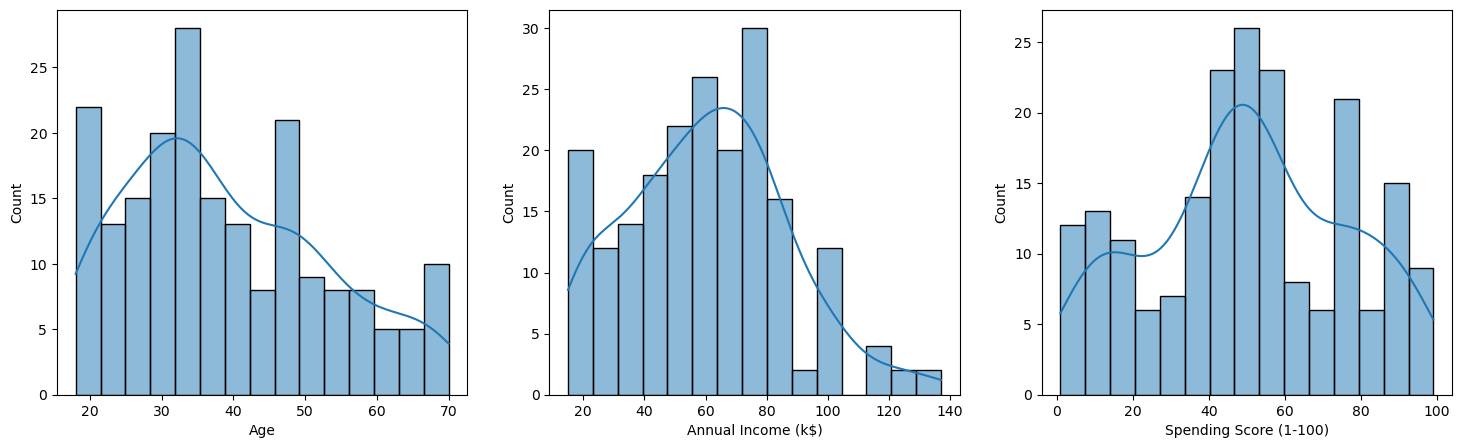

In [74]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['Age'], bins=15, kde=True, ax=ax[0])
sns.histplot(data['Annual Income (k$)'], bins=15, kde=True, ax=ax[1])
sns.histplot(data['Spending Score (1-100)'], bins=15, kde=True, ax=ax[2])
plt.show()


<Axes: xlabel='count', ylabel='Gender'>

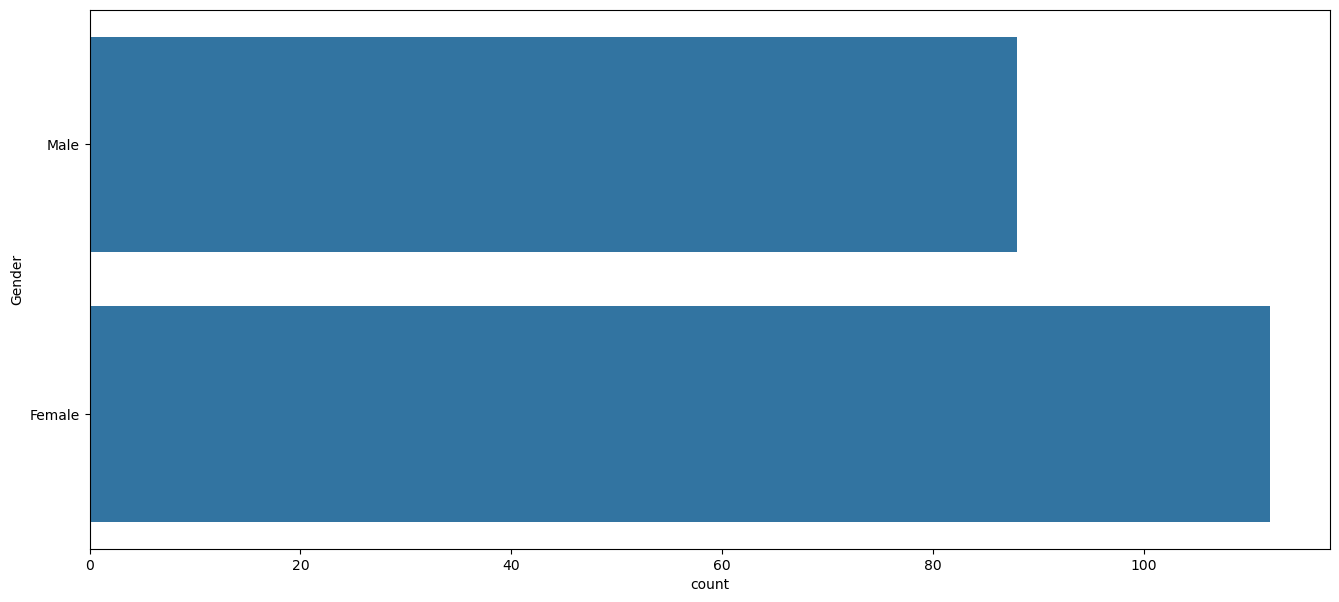

In [75]:
sns.countplot(data['Gender'])

# Female customers are more compared to male customers.

#### Bivariate Analysis
We use pair plots to visualize relationships between all pairs of quantitative variables. This step helps to spot trends, correlations, and patterns in data involving multiple dimensions.

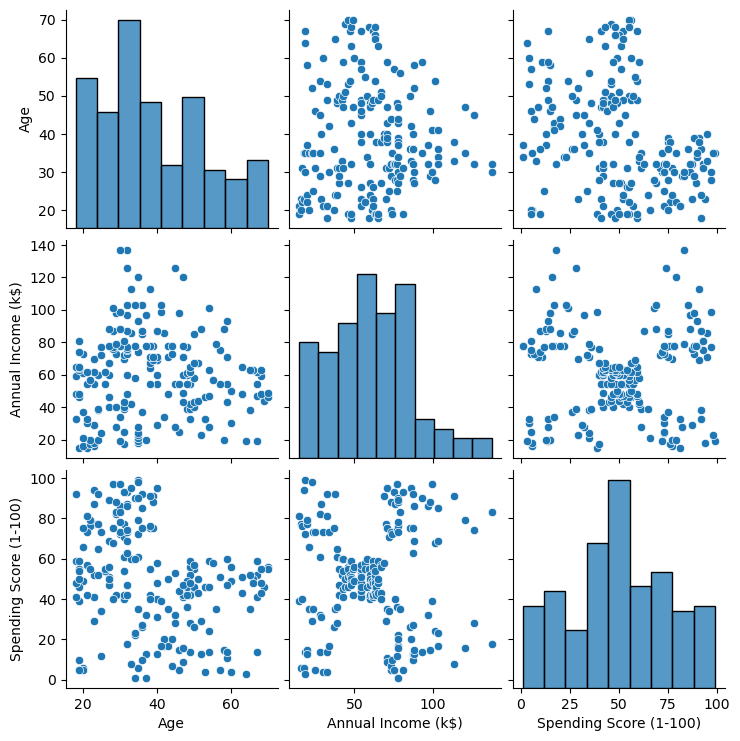

In [76]:
sns.pairplot(data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


#### Observations:
- Most of the customers are in the 20-40 age group.
- Spending score is high for the customers in the age group of 20-40.
- Spending score is high for customers with very low and very high income.

#### C. Heatmap Analysis
The heatmap provides a colored visual summary of the correlation between numerical variables. It's useful for spotting highly correlated attributes that might affect model performance due to multicollinearity.

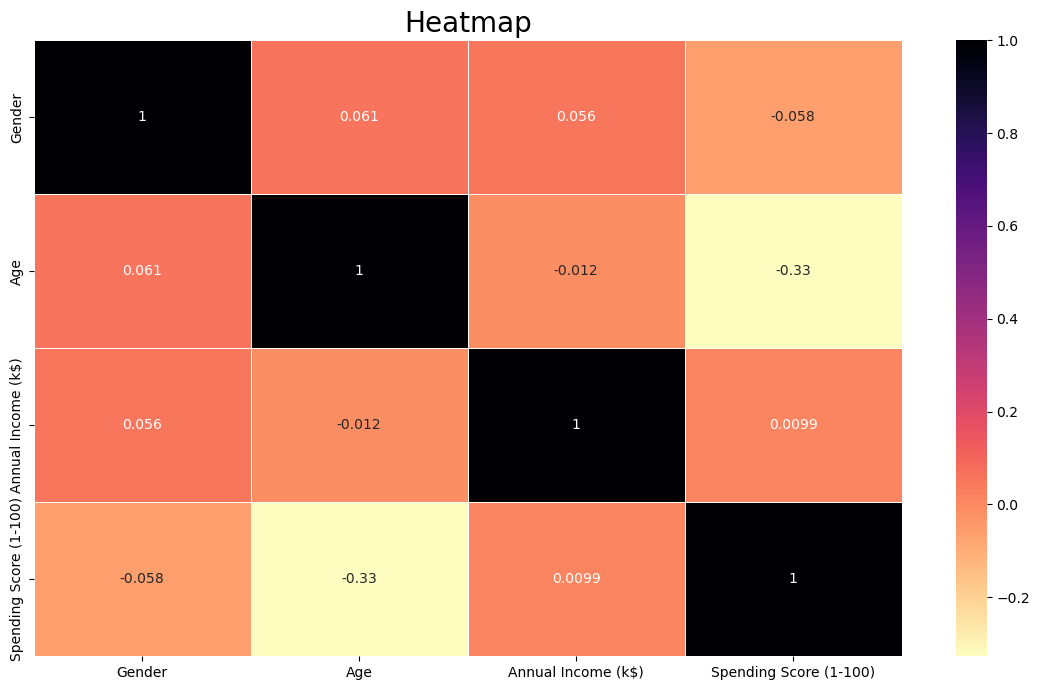

In [77]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})

plt.rcParams['figure.figsize'] = (14, 8)
sns.heatmap(data[[ 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].corr(), cmap = 'magma_r', annot = True, linewidths=.5)
plt.title('Heatmap', fontsize = 20)
plt.show()

# As we can see there is not much correlation between the features.

#### D- Inverstigating relationship between factors

- Gender vs Spending Score

Text(30.636728395061724, 0.5, 'Spending Score (1-100)')

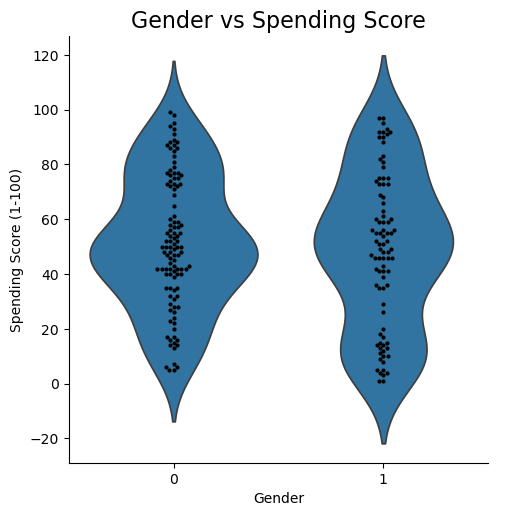

In [78]:
plt.rcParams['figure.figsize'] = (16, 7)
g = sns.catplot(x="Gender", y="Spending Score (1-100)", kind="violin", inner=None, data=data)
sns.swarmplot(x="Gender", y="Spending Score (1-100)", color="k", size=3, data=data, ax=g.ax);
plt.title('Gender vs Spending Score', fontsize = 16)
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')

- Gender vs Annual Income

Text(30.575617283950628, 0.5, 'Annual Income (k$)')

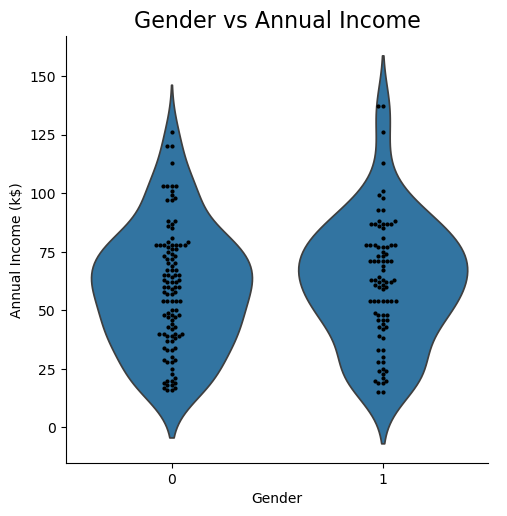

In [79]:
plt.rcParams['figure.figsize'] = (16, 7)
g = sns.catplot(x="Gender", y="Annual Income (k$)", kind="violin", inner=None, data=data)
sns.swarmplot(x="Gender", y="Annual Income (k$)", color="k", size=3, data=data, ax=g.ax);
plt.title('Gender vs Annual Income', fontsize = 16)
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')

- Gender vs Age

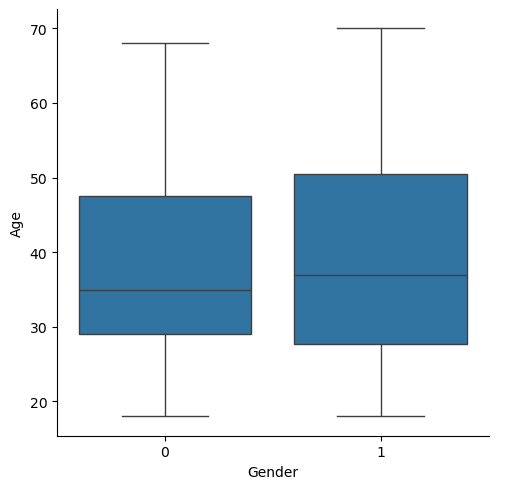

In [80]:
sns.catplot(x="Gender", y="Age", kind="box", data=data);

## Task-1
### Step 5: Applying K-Means Clustering
- Elbow Method: 
We use the Elbow method to determine the optimal number of clusters by fitting the model multiple times with a varying number of clusters and plotting the within-cluster sum of squares (WSS).



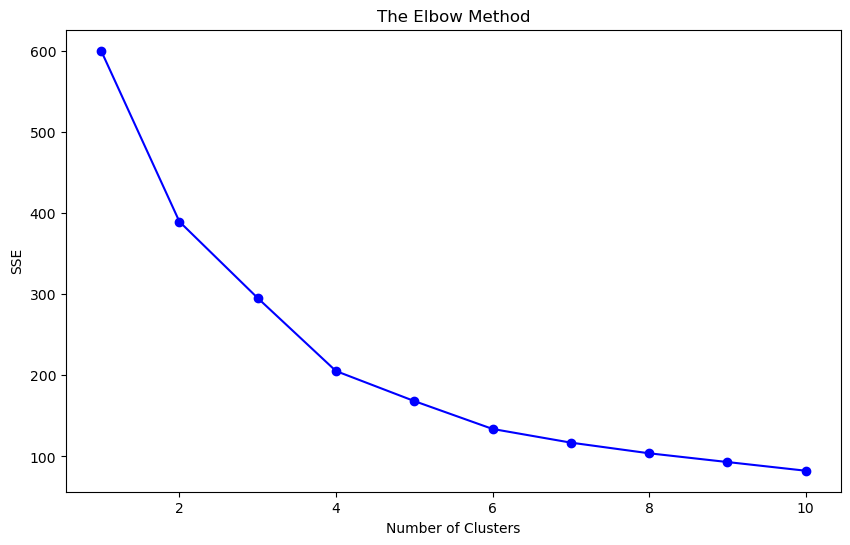

In [81]:
# To address the UserWarning, set the number of threads to 1 for MKL
os.environ['OMP_NUM_THREADS'] = '1'

# Initialize KMeans with n_init explicitly set
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=0)

# Proceed as before with your scaling and fitting
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('The Elbow Method')
plt.show()



From the above figure, we can see that last most significant slope occurs at k = 5 , hence we will have 5 clusters in this case

#### A- Kmeans based on "Age"
- Clustering and Visualzation

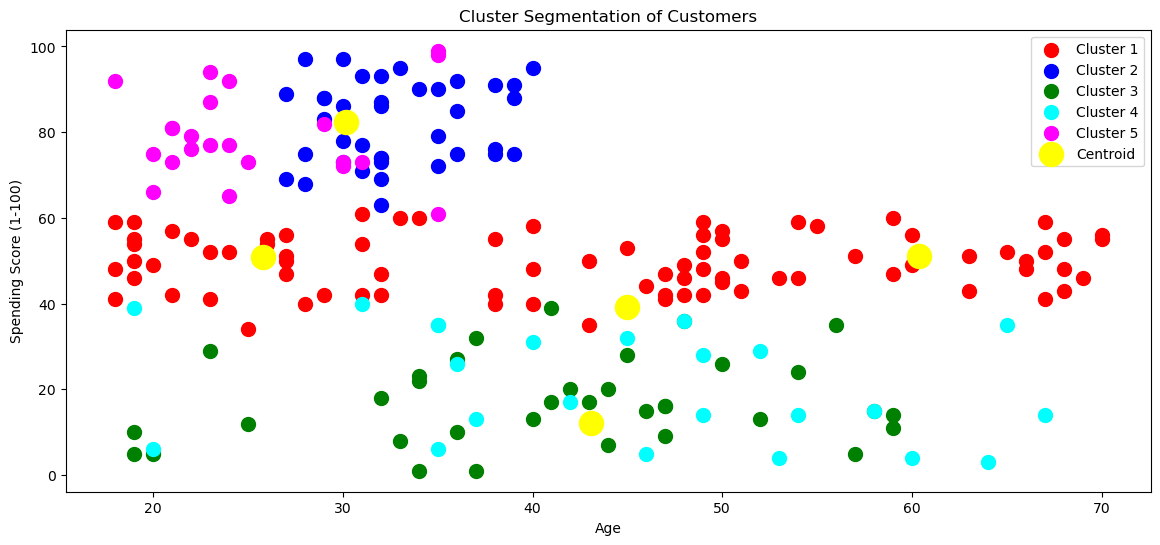

In [86]:
# Initialize KMeans
kmeans_age = KMeans(n_clusters=5, init='k-means++', random_state=0)

# Selecting the features for clustering
features = data[['Age', 'Spending Score (1-100)']]
# Fit and predict
y_age_kmeans = kmeans_age.fit_predict(features)

# Plotting the clusters
fig, ax = plt.subplots(figsize=(14,6))

# Colors for the clusters
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

# Plot each cluster
for i, color, label in zip(range(5), colors, cluster_labels):
    ax.scatter(features.loc[y_kmeans == i, 'Age'], features.loc[y_kmeans == i, 'Spending Score (1-100)'],
               s=100, c=color, label=label)

# Plot centroids
ax.scatter(kmeans_age.cluster_centers_[:, 0], kmeans_age.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')

plt.title('Cluster Segmentation of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


- Evaluation: Let's valuate the effectiveness of the K-means clustering algorithm baed on "Age" factor using the three metrics: Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index

In [88]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate the evaluation metrics
silhouette_avg = silhouette_score(features, y_age_kmeans)
davies_bouldin = davies_bouldin_score(features, y_age_kmeans)
calinski_harabasz = calinski_harabasz_score(features, y_age_kmeans)

# Print the scores
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")

Silhouette Score: 0.445
Davies-Bouldin Score: 0.785
Calinski-Harabasz Index: 302.439


- Silhouette Score (0.445):
   - Represents moderate clustering quality.
  -  Indicates some level of separation between clusters, but there may still be overlap, suggesting room for improvement.

- Davies-Bouldin Score (0.785):
   - Moderately low, which is generally favorable.
  -  Suggests that the clusters are relatively distinct, though not as clearly defined as they might be with a lower score.
- Calinski-Harabasz Index (302.439):
    - A high value, indicating good cluster definition.
    - Suggests that the clusters are well-separated and that the within-cluster variance is low compared to the between-cluster variance.

#### B- Kmeans based on "Annual Income"

- Clustering and Visualization

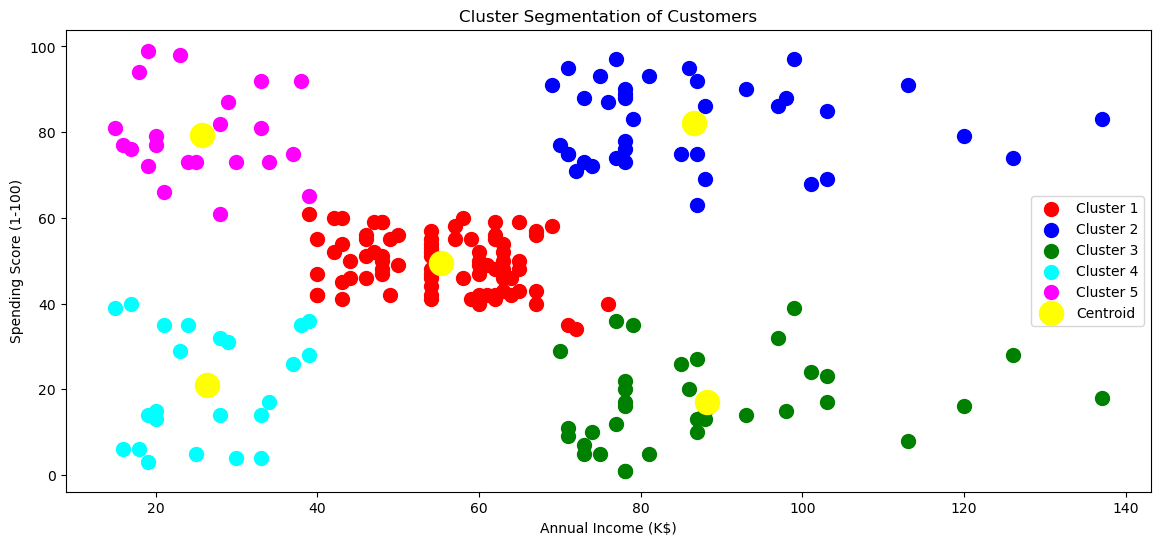

In [90]:
# Initialize KMeans
kmeans_annual = KMeans(n_clusters=5, init='k-means++', random_state=0)

# Selecting the features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
# Fit and predict
y_annual_kmeans = kmeans_annual.fit_predict(features)

# Plotting the clusters
fig, ax = plt.subplots(figsize=(14,6))

# Colors for the clusters
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

# Plot each cluster
for i, color, label in zip(range(5), colors, cluster_labels):
    ax.scatter(features.loc[y_kmeans == i, 'Annual Income (k$)'], features.loc[y_kmeans == i, 'Spending Score (1-100)'],
               s=100, c=color, label=label)

# Plot centroids
ax.scatter(kmeans_annual.cluster_centers_[:, 0], kmeans_annual.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')

plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()



- Evaluation: Let's valuate the effectiveness of the K-means clustering algorithm baed on "Annual Income" factor using the three metrics: Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index

In [61]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate the evaluation metrics
silhouette_avg = silhouette_score(features, y_annual_kmeans)
davies_bouldin = davies_bouldin_score(features, y_annual_kmeans)
calinski_harabasz = calinski_harabasz_score(features, y_annual_kmeans)

# Print the scores
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")


Silhouette Score: 0.554
Davies-Bouldin Score: 0.573
Calinski-Harabasz Index: 247.359


##### Interpretation:
- Silhouette Score (0.554):
   - Indicates moderate clustering quality.
   - Higher than previous results, suggesting better separation and compactness within clusters.

- Davies-Bouldin Score (0.573):
    - Relatively low value, which is desirable.
    - Indicates that the clusters are distinct and well-separated, with low similarity between - different clusters.

- Calinski-Harabasz Index (247.359):
    - Significantly higher than previously, suggesting even better-defined clusters.
    - Indicates that clusters are well-separated and more compact compared to earlier results.



### Conclusion
Comparing the two sets of metrics—based on clustering involving Age versus Annual Income—helps identify which feature may lead to more effective clustering according to the various evaluation metrics used.  Clustering based on Annual Income appears to be more effective than clustering based on Age when evaluating the compactness and separation of clusters (Silhouette and Davies-Bouldin Scores). The higher Silhouette Score and lower Davies-Bouldin Score for Annual Income suggest that clusters are more distinct and cohesive. In summary, based on the analysis of the metrics, clustering by Annual Income would generally be recommended over Age for clearer and more actionable customer segmentation

## Task-2
### Step 6: Applying Clustering with DBSCAN

#### A. DBSCAN Clustering Based on "Age" and "Spending Score (1-100)"
-  Apply and Visualize Clustering

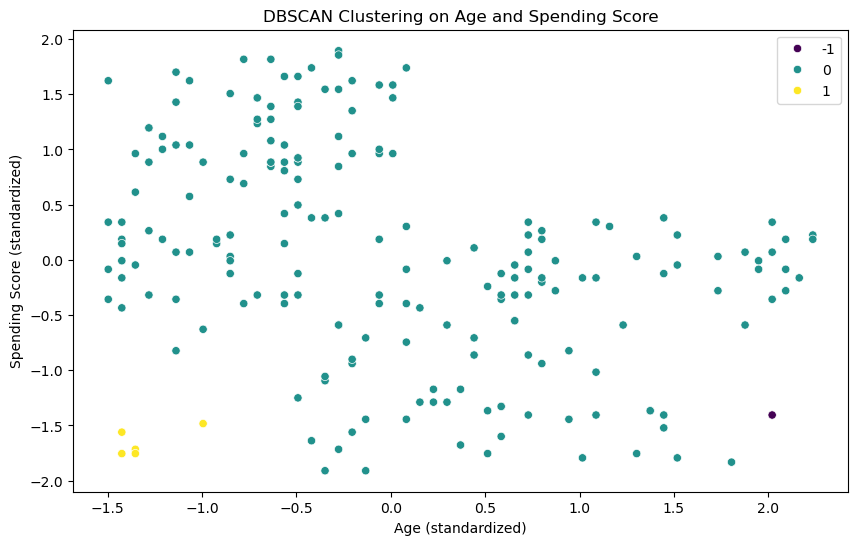

In [91]:
# Select and standardize the features
features_age_spending = data[['Age', 'Spending Score (1-100)']]
scaler_age_spending = StandardScaler()
features_age_spending_scaled = scaler_age_spending.fit_transform(features_age_spending)

# Initialize and fit DBSCAN
dbscan_age_spending = DBSCAN(eps=0.5, min_samples=5)
labels_age_spending = dbscan_age_spending.fit_predict(features_age_spending_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_age_spending_scaled[:, 0], y=features_age_spending_scaled[:, 1], hue=labels_age_spending, palette='viridis', legend='full')
plt.title('DBSCAN Clustering on Age and Spending Score')
plt.xlabel('Age (standardized)')
plt.ylabel('Spending Score (standardized)')
plt.show()



- Evaluate Clustering

In [92]:
# Evaluate the clustering
if np.unique(labels_age_spending).size > 1:  # Ensure there's more than one cluster
    silhouette = silhouette_score(features_age_spending_scaled, labels_age_spending)
    davies_bouldin = davies_bouldin_score(features_age_spending_scaled, labels_age_spending)
    calinski_harabasz = calinski_harabasz_score(features_age_spending_scaled, labels_age_spending)
    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Score: {davies_bouldin}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz}")
else:
    print("Not enough clusters to evaluate.")


Silhouette Score: 0.08622777399690013
Davies-Bouldin Score: 0.6236198119773536
Calinski-Harabasz Index: 7.669937321719628


##### Evaluation Metrics Interpretation
- Silhouette Score: 0.086
    - Indicates overlapping clusters.
    - This low score suggests that the clustering configuration did not effectively distinguish between the groups, implying poor separation and compactness within clusters.

- Davies-Bouldin Score: 0.624
    - Relatively high value, which is less desirable.
    - Indicates that the clusters are not well-separated and that there is significant similarity between different clusters.

- Calinski-Harabasz Index: 7.670
    - Significantly lower than ideal, indicating poorly-defined clusters.
    - A low value suggests that clusters are not dense and well-separated, which might reflect an ineffective clustering performance or suboptimal parameter settings.

These metrics collectively suggest that the clustering has not performed optimally in distinguishing distinct groups, which might necessitate a reevaluation of the clustering parameters or the selection of a different clustering algorithm.


#### B. DBSCAN Clustering Based on "Annual Income" and "Spending Score (1-100)"

- Apply and Visualize Clustering

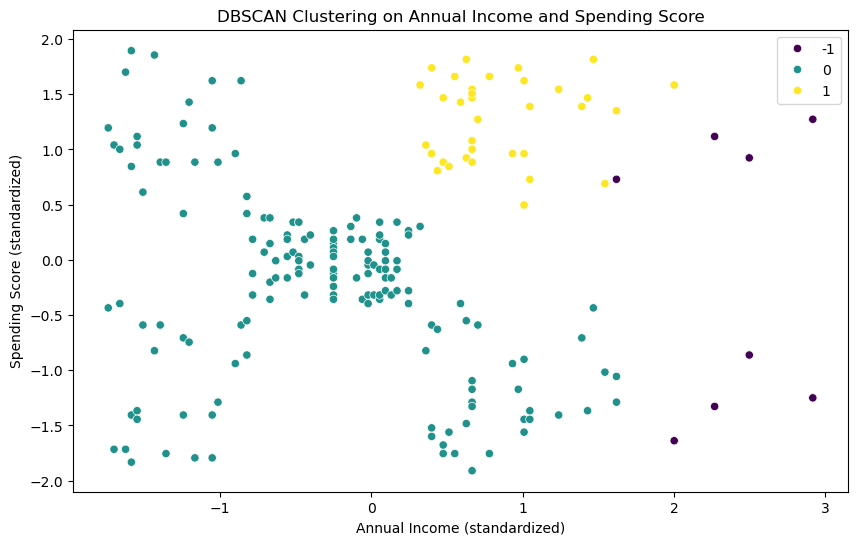

In [93]:
# Select and standardize the features
features_income_spending = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler_income_spending = StandardScaler()
features_income_spending_scaled = scaler_income_spending.fit_transform(features_income_spending)

# Initialize and fit DBSCAN
dbscan_income_spending = DBSCAN(eps=0.5, min_samples=5)
labels_income_spending = dbscan_income_spending.fit_predict(features_income_spending_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_income_spending_scaled[:, 0], y=features_income_spending_scaled[:, 1], hue=labels_income_spending, palette='viridis', legend='full')
plt.title('DBSCAN Clustering on Annual Income and Spending Score')
plt.xlabel('Annual Income (standardized)')
plt.ylabel('Spending Score (standardized)')
plt.show()


- Evaluate Clustering

In [94]:
# Evaluate the clustering
if np.unique(labels_income_spending).size > 1:
    silhouette = silhouette_score(features_income_spending_scaled, labels_income_spending)
    davies_bouldin = davies_bouldin_score(features_income_spending_scaled, labels_income_spending)
    calinski_harabasz = calinski_harabasz_score(features_income_spending_scaled, labels_income_spending)
    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Score: {davies_bouldin}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz}")
else:
    print("Not enough clusters to evaluate.")


Silhouette Score: 0.35044619989666004
Davies-Bouldin Score: 0.8285103931757106
Calinski-Harabasz Index: 60.838816010569076


##### Evaluation Metrics Interpretation

- Silhouette Score: 0.350
    - Indicates moderate clustering quality.
    - This score is higher than some previous results, suggesting some separation and compactness within clusters, though there's room for improvement.

- Davies-Bouldin Score: 0.829
    - Moderately high value, which is less desirable.
    - Indicates moderate similarity between clusters, suggesting that the clusters are not very distinct or well-separated.

- Calinski-Harabasz Index: 60.839
    - **Higher compared to very low values but still indicates room for improvement.**
    - This value suggests that while the clusters are somewhat denser and more separated than in very poor configurations, they still may not be particularly well-defined.

These metrics collectively suggest that while there is some structure to the data as recognized by the clustering configuration, the quality of separation and compactness within clusters might not be optimal. This may call for further adjustments in clustering parameters or consideration of different clustering algorithms to enhance performance.

### Conclusion
Similarly to what we've seen in case of K-means clusterin, The DBSCAN clustering based on "Annual Income" and "Spending Score (1-100)" demonstrates better performance compared to the clustering based on "Age" and "Spending Score (1-100)." While neither clustering configuration provides optimal results, the one using "Annual Income" and "Spending Score" shows some structure and separation that might be useful for specific analytical applications. The improved metrics in this setup suggest that "Annual Income" may be a more influential feature in defining customer segments than "Age" when combined with "Spending Score."